In [3]:
import sys
import math
import json
from dataclasses import dataclass, asdict
from datetime import date, timedelta
from typing import List, Dict, Any

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional document libraries; handled gracefully if unavailable
try:
    from docx import Document
    DOCX_AVAILABLE = True
except Exception:
    DOCX_AVAILABLE = False

try:
    from pptx import Presentation
    from pptx.util import Inches, Pt
    PPTX_AVAILABLE = True
except Exception:
    PPTX_AVAILABLE = False
    
    
    
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Libraries loaded.")
print("DOCX available:", DOCX_AVAILABLE)
print("PPTX available:", PPTX_AVAILABLE)




Libraries loaded.
DOCX available: True
PPTX available: True


In [2]:
#Project parameters
@dataclass
class ProjectParams:
    company_name: str = "Aurora Mobility"
    product_name: str = "Aurora E-Urban Pro"
    launch_in_months: int = 3
    base_region: str = "India"
    primary_cities: List[str] = ("Pune", "Mumbai", "Bengaluru", "Delhi", "Hyderabad")
    target_segments: List[str] = ("Eco-conscious commuters", "Urban professionals", "Last-mile delivery")
    currency: str = "INR"
    unit_price: int = 89999  # retail price including tax
    unit_cost: int = 52000   # landed cost per unit
    initial_inventory: int = 1500
    production_capacity_per_month: int = 800
    marketing_budget_total: int = 12000000  # 1.2 Cr
    sales_channels: List[str] = ("D2C website", "Marketplace", "Dealers", "Corporate bulk")
    warranty_months: int = 24

params = ProjectParams()
params_dict = asdict(params)
pd.Series(params_dict)
@dataclass
class ProjectParams:
    company_name: str = "Aurora Mobility"
    product_name: str = "Aurora E-Urban Pro"
    launch_in_months: int = 3
    base_region: str = "India"
    primary_cities: List[str] = ("Pune", "Mumbai", "Bengaluru", "Delhi", "Hyderabad")
    target_segments: List[str] = ("Eco-conscious commuters", "Urban professionals", "Last-mile delivery")
    currency: str = "INR"
    unit_price: int = 89999  # retail price including tax
    unit_cost: int = 52000   # landed cost per unit
    initial_inventory: int = 1500
    production_capacity_per_month: int = 800
    marketing_budget_total: int = 12000000  # 1.2 Cr
    sales_channels: List[str] = ("D2C website", "Marketplace", "Dealers", "Corporate bulk")
    warranty_months: int = 24

params = ProjectParams()
params_dict = asdict(params)
pd.Series(params_dict)


company_name                                                       Aurora Mobility
product_name                                                    Aurora E-Urban Pro
launch_in_months                                                                 3
base_region                                                                  India
primary_cities                         (Pune, Mumbai, Bengaluru, Delhi, Hyderabad)
target_segments                  (Eco-conscious commuters, Urban professionals,...
currency                                                                       INR
unit_price                                                                   89999
unit_cost                                                                    52000
initial_inventory                                                             1500
production_capacity_per_month                                                  800
marketing_budget_total                                                    12000000
sale

In [3]:
# Timeline setup

launch_date = date.today() + timedelta(days=30 * params.launch_in_months)
phases = pd.DataFrame({
    "Phase": [
        "Discovery & alignment", "Feature finalization", "Marketing prep",
        "Preorders & PR", "Launch", "Post-launch optimization"
    ],
    "Start": [
        date.today(), date.today() + timedelta(days=10), date.today() + timedelta(days=25),
        date.today() + timedelta(days=45), launch_date, launch_date + timedelta(days=15)
    ],
    "End": [
        date.today() + timedelta(days=10), date.today() + timedelta(days=25), date.today() + timedelta(days=45),
        launch_date, launch_date + timedelta(days=15), launch_date + timedelta(days=60)
    ]
})
phases


,Phase,Start,End
0,Discovery & alignment,2025-12-27,2026-01-06
1,Feature finalization,2026-01-06,2026-01-21
2,Marketing prep,2026-01-21,2026-02-10
3,Preorders & PR,2026-02-10,2026-03-27
4,Launch,2026-03-27,2026-04-11
5,Post-launch optimization,2026-04-11,2026-05-26


# Strategic objectives

In [4]:
# Define strategic objectives
objectives = pd.DataFrame([
    {"Objective": "Market share (Tier-1/2 urban e-bike)", "Target": "2% by Month 6", "Metric": "Share of new e-bike registrations"},
    {"Objective": "Revenue", "Target": f"{params.currency} 20 Cr within 6 months", "Metric": "Net revenue (post returns)"},
    {"Objective": "Customer adoption", "Target": "3,500 units sold by Month 6", "Metric": "Cumulative unit sales"},
    {"Objective": "NPS", "Target": "≥ 60 by Month 4", "Metric": "Net Promoter Score"},
    {"Objective": "Brand awareness", "Target": "30% aided awareness by Month 6", "Metric": "Brand survey"},
    {"Objective": "CAC", "Target": f"≤ {params.currency} 8,000", "Metric": "Customer acquisition cost"},
])
objectives


,Objective,Target,Metric
0,Market share (Tier-1/2 urban e-bike),2% by Month 6,Share of new e-bike registrations
1,Revenue,INR 20 Cr within 6 months,Net revenue (post returns)
2,Customer adoption,"3,500 units sold by Month 6",Cumulative unit sales
3,NPS,≥ 60 by Month 4,Net Promoter Score
4,Brand awareness,30% aided awareness by Month 6,Brand survey
5,CAC,"≤ INR 8,000",Customer acquisition cost


In [6]:
# Constraints & alignment check

constraints = pd.DataFrame([
    {"Constraint": "Production capacity", "Detail": f"{params.production_capacity_per_month} units/month"},
    {"Constraint": "Initial inventory", "Detail": f"{params.initial_inventory} units"},
    {"Constraint": "Unit economics", "Detail": f"Price {params.unit_price} | Cost {params.unit_cost}"},
    {"Constraint": "Budget", "Detail": f"Marketing {params.marketing_budget_total}"},
    {"Constraint": "Regional rollout", "Detail": ", ".join(params.primary_cities)},
])


# Simple sanity checks:
def alignment_notes(objectives_df: pd.DataFrame, constraints_df: pd.DataFrame) -> List[str]:
    notes = []
    # Sales feasibility
    target_units = 3500
    six_month_capacity = params.production_capacity_per_month * 6 + params.initial_inventory
    if target_units > six_month_capacity:
        notes.append("Target units exceed combined capacity; consider ramping production or deferring target.")
    else:
        notes.append("Unit sales target is feasible within capacity envelope.")
    # CAC feasibility
    max_cac = 8000
    # Heuristic: marketing budget / target customers
    est_cac = params.marketing_budget_total / max(1, target_units)
    notes.append(f"Estimated CAC from budget: {params.currency} {int(est_cac)} vs target ≤ {params.currency} {max_cac}.")
    # Revenue feasibility
    est_revenue = target_units * params.unit_price
    notes.append(f"Projected revenue at target adoption: {params.currency} {est_revenue:,}.")
    return notes

notes = alignment_notes(objectives, constraints)
pd.DataFrame({"Alignment notes": notes})


,Alignment notes
0,Unit sales target is feasible within capacity ...
1,Estimated CAC from budget: INR 3428 vs target ...
2,"Projected revenue at target adoption: INR 314,..."


In [11]:
# Generate strategic objectives summary 
summary_md = f"""
# Strategic Launch Framework: {params.product_name}

## Objectives
{objectives.to_markdown(index=False)}

## Constraints
{constraints.to_markdown(index=False)}

## Alignment notes
- {notes[0]}
- {notes[1]}
- {notes[2]}

## Key priorities
- Focus Tier-1/2 urban corridors for first 6 months.
- Protect CAC via strong organic + referral loops and dealer activations.
- Ensure post-sales excellence to hit NPS ≥ 60 by Month 4.
"""

print(summary_md)



# Strategic Launch Framework: Aurora E-Urban Pro

## Objectives
| Objective                            | Target                         | Metric                            |
|:-------------------------------------|:-------------------------------|:----------------------------------|
| Market share (Tier-1/2 urban e-bike) | 2% by Month 6                  | Share of new e-bike registrations |
| Revenue                              | INR 20 Cr within 6 months      | Net revenue (post returns)        |
| Customer adoption                    | 3,500 units sold by Month 6    | Cumulative unit sales             |
| NPS                                  | ≥ 60 by Month 4                | Net Promoter Score                |
| Brand awareness                      | 30% aided awareness by Month 6 | Brand survey                      |
| CAC                                  | ≤ INR 8,000                    | Customer acquisition cost         |

## Constraints
| Constraint          | Detail         

In [12]:
# DOCX summary 
if DOCX_AVAILABLE:
    doc = Document()
    doc.add_heading(f"Strategic Launch Framework: {params.product_name}", level=1)
    doc.add_heading("Objectives", level=2)
    for _, row in objectives.iterrows():
        doc.add_paragraph(f"- {row['Objective']}: {row['Target']} ({row['Metric']})")
    doc.add_heading("Constraints", level=2)
    for _, row in constraints.iterrows():
        doc.add_paragraph(f"- {row['Constraint']}: {row['Detail']}")
    doc.add_heading("Alignment notes", level=2)
    for n in notes:
        doc.add_paragraph(f"- {n}")
    doc.add_heading("Key priorities", level=2)
    for p in [
        "Focus Tier-1/2 urban corridors for first 6 months.",
        "Protect CAC via strong organic + referral loops and dealer activations.",
        "Ensure post-sales excellence to hit NPS ≥ 60 by Month 4."
    ]:
        doc.add_paragraph(f"- {p}")
    doc.save("01_strategic_launch_framework.docx")
    print("DOCX created.")
else:
    print("DOCX library not available; using Markdown output above.")


DOCX created.


# Market analysis and positioning

In [14]:
# Synthetic market landscape
np.random.seed(42)
competitors = pd.DataFrame({
    "Brand": ["VoltRide", "EcoMotion", "UrbanGo", "GreenFleet", "SwiftE"],
    "Price_INR": [79999, 94999, 89999, 99999, 74999],
    "Range_km": [80, 95, 85, 100, 70],
    "TopSpeed_kmph": [45, 50, 48, 52, 42],
    "Weight_kg": [24, 26, 25, 27, 23],
    "Warranty_months": [18, 24, 24, 36, 18],
    "Motor_power_W": [500, 750, 650, 750, 450],
    "Fast_charge": [True, True, True, True, False],
    "App_connect": [True, True, True, True, False],
    "After_sales_index": [62, 68, 65, 72, 58],
    "Dealer_network": [120, 140, 130, 160, 100]
})

# Add our product for comparison
ours = pd.DataFrame([{
    "Brand": params.product_name,
    "Price_INR": params.unit_price,
    "Range_km": 92,
    "TopSpeed_kmph": 50,
    "Weight_kg": 25,
    "Warranty_months": params.warranty_months,
    "Motor_power_W": 700,
    "Fast_charge": True,
    "App_connect": True,
    "After_sales_index": 70,
    "Dealer_network": 110
}])

landscape = pd.concat([competitors, ours], ignore_index=True)
landscape



,Brand,Price_INR,Range_km,TopSpeed_kmph,Weight_kg,Warranty_months,Motor_power_W,Fast_charge,App_connect,After_sales_index,Dealer_network
0,VoltRide,79999,80,45,24,18,500,True,True,62,120
1,EcoMotion,94999,95,50,26,24,750,True,True,68,140
2,UrbanGo,89999,85,48,25,24,650,True,True,65,130
3,GreenFleet,99999,100,52,27,36,750,True,True,72,160
4,SwiftE,74999,70,42,23,18,450,False,False,58,100
5,Aurora E-Urban Pro,89999,92,50,25,24,700,True,True,70,110


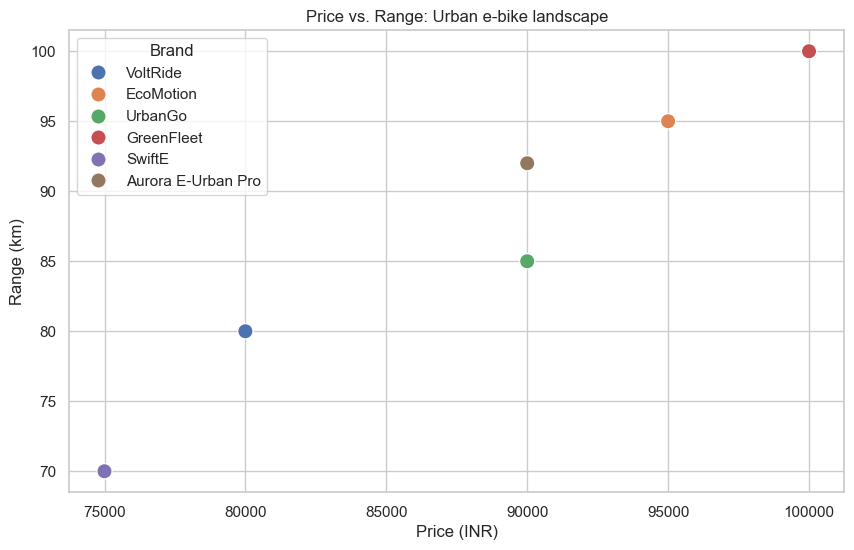

In [15]:
# Visuals: Price vs. Range and feature radar-like summary

fig, ax = plt.subplots()
sns.scatterplot(data=landscape, x="Price_INR", y="Range_km", hue="Brand", ax=ax, s=120)
ax.set_title("Price vs. Range: Urban e-bike landscape")
ax.set_xlabel("Price (INR)")
ax.set_ylabel("Range (km)")
plt.show()


In [16]:
# Feature score
features = ["Range_km", "TopSpeed_kmph", "Warranty_months", "After_sales_index", "Dealer_network", "Motor_power_W"]
feature_scores = landscape.copy()
for f in features:
    feature_scores[f] = (feature_scores[f] - feature_scores[f].min()) / (feature_scores[f].max() - feature_scores[f].min())

feature_scores["Composite_score"] = feature_scores[features].mean(axis=1)
feature_scores.sort_values("Composite_score", ascending=False)[["Brand", "Composite_score"] + features]


,Brand,Composite_score,Range_km,TopSpeed_kmph,Warranty_months,After_sales_index,Dealer_network,Motor_power_W
3,GreenFleet,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
1,EcoMotion,0.724603,0.833333,0.8,0.333333,0.714286,0.666667,1.000000
5,Aurora E-Urban Pro,0.620635,0.733333,0.8,0.333333,0.857143,0.166667,0.833333
2,UrbanGo,0.516667,0.500000,0.6,0.333333,0.500000,0.500000,0.666667
0,VoltRide,0.236508,0.333333,0.3,0.000000,0.285714,0.333333,0.166667
4,SwiftE,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [17]:
# Segment insights
segments = pd.DataFrame({
    "Segment": ["Eco-conscious commuters", "Urban professionals", "Last-mile delivery"],
    "Size_index": [85, 70, 60],
    "Price_sensitivity": ["High", "Medium", "Medium"],
    "Top_features": ["Range, comfort", "Speed, design, app", "Durability, service"]
})
segments


,Segment,Size_index,Price_sensitivity,Top_features
0,Eco-conscious commuters,85,High,"Range, comfort"
1,Urban professionals,70,Medium,"Speed, design, app"
2,Last-mile delivery,60,Medium,"Durability, service"


In [18]:
# Positioning statement builder
positioning = f"""
For {', '.join(params.target_segments)}, {params.product_name} is the premium-urban e-bike that blends
92 km real-world range, 50 km/h top speed, and 24-month warranty with smart app connectivity and fast charging.
Unlike higher-priced competitors, it delivers balanced performance and dependable after-sales support,
optimized for Indian urban corridors and dealer-assisted onboarding.
""".strip()

print(positioning)


For Eco-conscious commuters, Urban professionals, Last-mile delivery, Aurora E-Urban Pro is the premium-urban e-bike that blends
92 km real-world range, 50 km/h top speed, and 24-month warranty with smart app connectivity and fast charging.
Unlike higher-priced competitors, it delivers balanced performance and dependable after-sales support,
optimized for Indian urban corridors and dealer-assisted onboarding.


# Marketing strategy and creative materials

In [19]:
# Channel plan with budgets and KPIs
channels = pd.DataFrame([
    {"Channel": "Search Ads", "Budget_INR": 2500000, "Primary_KPI": "ROAS ≥ 3.5", "Secondary_KPI": "CAC ≤ 8000"},
    {"Channel": "Social (Paid)", "Budget_INR": 3000000, "Primary_KPI": "CTR ≥ 2.5%", "Secondary_KPI": "Lead rate ≥ 5%"},
    {"Channel": "Influencers", "Budget_INR": 1500000, "Primary_KPI": "Reach 20M", "Secondary_KPI": "Engagement ≥ 3%"},
    {"Channel": "PR & Launch Event", "Budget_INR": 2000000, "Primary_KPI": "Tier-1 coverage", "Secondary_KPI": "Share of voice ≥ 15%"},
    {"Channel": "Dealer Activations", "Budget_INR": 2000000, "Primary_KPI": "Footfall +15%", "Secondary_KPI": "Test rides ≥ 5,000"},
])
channels["Budget_share_%"] = (channels["Budget_INR"] / channels["Budget_INR"].sum() * 100).round(1)
channels


,Channel,Budget_INR,Primary_KPI,Secondary_KPI,Budget_share_%
0,Search Ads,2500000,ROAS ≥ 3.5,CAC ≤ 8000,22.7
1,Social (Paid),3000000,CTR ≥ 2.5%,Lead rate ≥ 5%,27.3
2,Influencers,1500000,Reach 20M,Engagement ≥ 3%,13.6
3,PR & Launch Event,2000000,Tier-1 coverage,Share of voice ≥ 15%,18.2
4,Dealer Activations,2000000,Footfall +15%,"Test rides ≥ 5,000",18.2


C:\Users\admin\AppData\Local\Temp\ipykernel_15448\1004214957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channels, x="Channel", y="Budget_INR", palette="viridis")


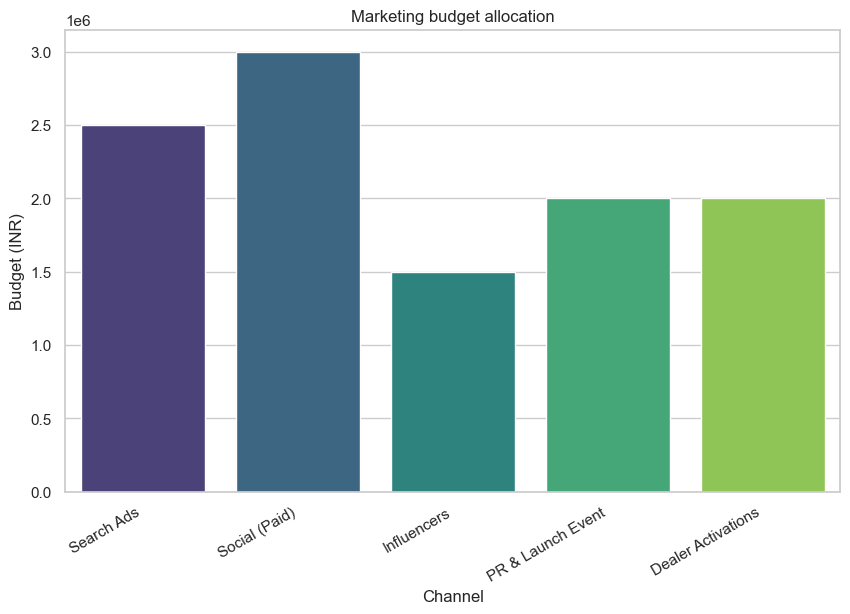

In [20]:
# Visual: Budget distribution
plt.figure()
sns.barplot(data=channels, x="Channel", y="Budget_INR", palette="viridis")
plt.xticks(rotation=30, ha="right")
plt.title("Marketing budget allocation")
plt.ylabel("Budget (INR)")
plt.show()


In [21]:
# Sample press release and social content
press_release = f"""
Aurora Mobility announces the {params.product_name}, a new benchmark for urban electric mobility.
With up to 92 km real-world range, 50 km/h top speed, and fast-charging with smart app connectivity,
the {params.product_name} is designed for India’s urban corridors. Preorders open today across D2C and dealer channels.

Key highlights:
- 24-month comprehensive warranty
- Dealer-assisted onboarding and dependable after-sales support
- Competitive ownership costs and financing options
"""

social_posts = [
    "Urban commutes, upgraded. Meet Aurora E-Urban Pro: range, speed, and smart connectivity for Indian cities.",
    "From Pune to Delhi—go farther on a single charge. Test rides open now. #AuroraEUrbanPro",
    "Fast charge. Smart app. Solid warranty. This is how urban mobility should feel."
]
print(press_release)
print("\nSocial Posts:")
for s in social_posts:
    print(f"- {s}")



Aurora Mobility announces the Aurora E-Urban Pro, a new benchmark for urban electric mobility.
With up to 92 km real-world range, 50 km/h top speed, and fast-charging with smart app connectivity,
the Aurora E-Urban Pro is designed for India’s urban corridors. Preorders open today across D2C and dealer channels.

Key highlights:
- 24-month comprehensive warranty
- Dealer-assisted onboarding and dependable after-sales support
- Competitive ownership costs and financing options


Social Posts:
- Urban commutes, upgraded. Meet Aurora E-Urban Pro: range, speed, and smart connectivity for Indian cities.
- From Pune to Delhi—go farther on a single charge. Test rides open now. #AuroraEUrbanPro
- Fast charge. Smart app. Solid warranty. This is how urban mobility should feel.


In [22]:
# Strategy summary

strategy_md = f"""
# Marketing strategy overview

## Channels and budget
{channels.to_markdown(index=False)}

## Campaign pillars
- Performance acquisition: Search + Social, CAC guardrails.
- Credibility: PR + Influencers to drive awareness and trust.
- Experience: Dealer activations + test rides to convert intent.

## Sample materials
Press release:
{press_release}

Top social posts:
- {social_posts[0]}
- {social_posts[1]}
- {social_posts[2]}
""".strip()

print(strategy_md)

if DOCX_AVAILABLE:
    doc = Document()
    doc.add_heading("Marketing strategy overview", level=1)
    doc.add_heading("Channels and budget", level=2)
    for _, row in channels.iterrows():
        doc.add_paragraph(f"- {row['Channel']}: {params.currency} {row['Budget_INR']} | KPI: {row['Primary_KPI']} / {row['Secondary_KPI']}")
    doc.add_heading("Campaign pillars", level=2)
    for p in ["Performance acquisition", "Credibility", "Experience"]:
        doc.add_paragraph(f"- {p}")
    doc.add_heading("Press release", level=2)
    doc.add_paragraph(press_release)
    doc.add_heading("Top social posts", level=2)
    for s in social_posts:
        doc.add_paragraph(f"- {s}")
    doc.save("03_marketing_strategy_overview.docx")
    print("Marketing strategy DOCX created.")


# Marketing strategy overview

## Channels and budget
| Channel            |   Budget_INR | Primary_KPI     | Secondary_KPI        |   Budget_share_% |
|:-------------------|-------------:|:----------------|:---------------------|-----------------:|
| Search Ads         |      2500000 | ROAS ≥ 3.5      | CAC ≤ 8000           |             22.7 |
| Social (Paid)      |      3000000 | CTR ≥ 2.5%      | Lead rate ≥ 5%       |             27.3 |
| Influencers        |      1500000 | Reach 20M       | Engagement ≥ 3%      |             13.6 |
| PR & Launch Event  |      2000000 | Tier-1 coverage | Share of voice ≥ 15% |             18.2 |
| Dealer Activations |      2000000 | Footfall +15%   | Test rides ≥ 5,000   |             18.2 |

## Campaign pillars
- Performance acquisition: Search + Social, CAC guardrails.
- Credibility: PR + Influencers to drive awareness and trust.
- Experience: Dealer activations + test rides to convert intent.

## Sample materials
Press release:

Aurora Mobility

# Financial model and KPI dashboard

In [23]:
# Monthly projections 
months = pd.date_range(start=date.today(), periods=6, freq="MS")
monthly_units = [400, 600, 800, 900, 1000, 1100]  # adjust as needed
monthly_df = pd.DataFrame({
    "Month": months,
    "Units_sold": monthly_units
})
monthly_df["Revenue_INR"] = monthly_df["Units_sold"] * params.unit_price
monthly_df["COGS_INR"] = monthly_df["Units_sold"] * params.unit_cost
monthly_df["Gross_profit_INR"] = monthly_df["Revenue_INR"] - monthly_df["COGS_INR"]

# Marketing monthly spend (simplified equal allocation)
monthly_df["Marketing_spend_INR"] = params.marketing_budget_total / len(monthly_df)
monthly_df["Operating_costs_INR"] = 3000000  # fixed ops overhead
monthly_df["Contribution_INR"] = monthly_df["Gross_profit_INR"] - (monthly_df["Marketing_spend_INR"] + monthly_df["Operating_costs_INR"])
monthly_df


,Month,Units_sold,Revenue_INR,COGS_INR,Gross_profit_INR,Marketing_spend_INR,Operating_costs_INR,Contribution_INR
0,2026-01-01,400,35999600,20800000,15199600,2000000.0,3000000,10199600.0
1,2026-02-01,600,53999400,31200000,22799400,2000000.0,3000000,17799400.0
2,2026-03-01,800,71999200,41600000,30399200,2000000.0,3000000,25399200.0
3,2026-04-01,900,80999100,46800000,34199100,2000000.0,3000000,29199100.0
4,2026-05-01,1000,89999000,52000000,37999000,2000000.0,3000000,32999000.0
5,2026-06-01,1100,98998900,57200000,41798900,2000000.0,3000000,36798900.0


In [24]:
# Breakeven analysis
fixed_costs_total = monthly_df["Operating_costs_INR"].sum() + params.marketing_budget_total
unit_contribution = params.unit_price - params.unit_cost
breakeven_units = math.ceil(fixed_costs_total / unit_contribution)

breakeven_summary = {
    "Fixed_costs_total_INR": int(fixed_costs_total),
    "Unit_contribution_INR": unit_contribution,
    "Breakeven_units": breakeven_units,
}
breakeven_summary


{'Fixed_costs_total_INR': 30000000,
 'Unit_contribution_INR': 37999,
 'Breakeven_units': 790}

In [25]:
# ROI estimation 

total_revenue = monthly_df["Revenue_INR"].sum()
total_costs = monthly_df["COGS_INR"].sum() + monthly_df["Marketing_spend_INR"].sum() + monthly_df["Operating_costs_INR"].sum()
net_profit = total_revenue - total_costs
roi_pct = round((net_profit / total_costs) * 100, 2)

kpi_overview = pd.DataFrame([
    {"KPI": "Total revenue (6m)", "Value": f"{params.currency} {total_revenue:,}"},
    {"KPI": "Total costs (6m)", "Value": f"{params.currency} {int(total_costs):,}"},
    {"KPI": "Net profit (6m)", "Value": f"{params.currency} {int(net_profit):,}"},
    {"KPI": "ROI (%)", "Value": f"{roi_pct}%"},
    {"KPI": "Breakeven units", "Value": breakeven_units}
])
kpi_overview


,KPI,Value
0,Total revenue (6m),"INR 431,995,200"
1,Total costs (6m),"INR 279,600,000"
2,Net profit (6m),"INR 152,395,200"
3,ROI (%),54.5%
4,Breakeven units,790


###  Visuals: Units and contribution over time

In [9]:
print(monthly_df.columns)


Index(['Month', 'Units_sold', 'Month_str'], dtype='object')


In [12]:
import pandas as pd
import math
from datetime import date

# Example assumptions (adjust to your case)
unit_price = 89999
unit_cost = 52000
marketing_budget_total = 12000000

months = pd.date_range(start=date.today(), periods=6, freq="MS")
monthly_units = [400, 600, 800, 900, 1000, 1100]  # adjust as needed

monthly_df = pd.DataFrame({
    "Month": months,
    "Units_sold": monthly_units
})

# Calculate revenue and costs
monthly_df["Revenue_INR"] = monthly_df["Units_sold"] * unit_price
monthly_df["COGS_INR"] = monthly_df["Units_sold"] * unit_cost

# Now create Gross Profit
monthly_df["Gross_profit_INR"] = monthly_df["Revenue_INR"] - monthly_df["COGS_INR"]

# Add marketing and operating costs
monthly_df["Marketing_spend_INR"] = marketing_budget_total / len(monthly_df)
monthly_df["Operating_costs_INR"] = 3000000  # fixed ops overhead

# Finally, Contribution
monthly_df["Contribution_INR"] = (
    monthly_df["Gross_profit_INR"]
    - (monthly_df["Marketing_spend_INR"] + monthly_df["Operating_costs_INR"])
)

print(monthly_df.head())


       Month  Units_sold  Revenue_INR  COGS_INR  Gross_profit_INR  \
0 2026-01-01         400     35999600  20800000          15199600   
1 2026-02-01         600     53999400  31200000          22799400   
2 2026-03-01         800     71999200  41600000          30399200   
3 2026-04-01         900     80999100  46800000          34199100   
4 2026-05-01        1000     89999000  52000000          37999000   

   Marketing_spend_INR  Operating_costs_INR  Contribution_INR  
0            2000000.0              3000000        10199600.0  
1            2000000.0              3000000        17799400.0  
2            2000000.0              3000000        25399200.0  
3            2000000.0              3000000        29199100.0  
4            2000000.0              3000000        32999000.0  


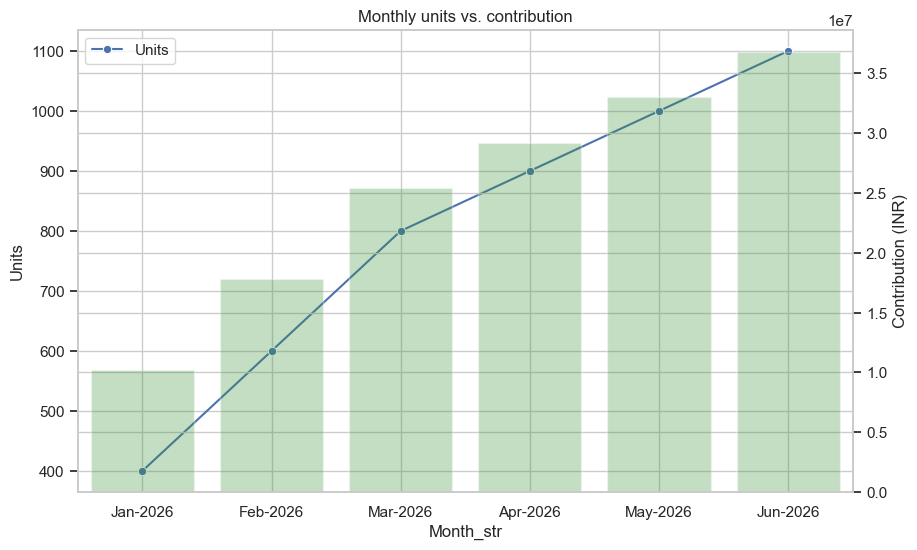

In [13]:
monthly_df["Month_str"] = monthly_df["Month"].dt.strftime("%b-%Y")

fig, ax = plt.subplots()
sns.lineplot(data=monthly_df, x="Month_str", y="Units_sold", marker="o", ax=ax, label="Units")

ax2 = ax.twinx()
sns.barplot(data=monthly_df, x="Month_str", y="Contribution_INR", alpha=0.3, ax=ax2, color="tab:green")

ax.set_title("Monthly units vs. contribution")
ax.set_ylabel("Units")
ax2.set_ylabel("Contribution (INR)")
plt.xticks(rotation=30, ha="right")
plt.show()


In [ ]:

# Breakeven analysis
fixed_costs_total = monthly_df["Operating_costs_INR"].sum() + monthly_df["Marketing_spend_INR"].sum()
unit_contribution = unit_price - unit_cost
breakeven_units = math.ceil(fixed_costs_total / unit_contribution)

breakeven_summary = {
    "Fixed_costs_total_INR": int(fixed_costs_total),
    "Unit_contribution_INR": unit_contribution,
    "Breakeven_units": breakeven_units,
}

print(breakeven_summary)






{'Fixed_costs_total_INR': 30000000, 'Unit_contribution_INR': 37999, 'Breakeven_units': 790}


In [21]:
# KPI overview
total_revenue = monthly_df["Revenue_INR"].sum()
total_costs = (
    monthly_df["COGS_INR"].sum()
    + monthly_df["Marketing_spend_INR"].sum()
    + monthly_df["Operating_costs_INR"].sum()
)
net_profit = total_revenue - total_costs
roi_pct = round((net_profit / total_costs) * 100, 2)

kpi_overview = pd.DataFrame([
    {"KPI": "Total revenue (6m)", "Value": f"INR {total_revenue:,}"},
    {"KPI": "Total costs (6m)", "Value": f"INR {int(total_costs):,}"},
    {"KPI": "Net profit (6m)", "Value": f"INR {int(net_profit):,}"},
    {"KPI": "ROI (%)", "Value": f"{roi_pct}%"},
    {"KPI": "Breakeven units", "Value": breakeven_units},
])



In [22]:
# Export to Excel
with pd.ExcelWriter("04_financials_kpi_dashboard.xlsx", engine="openpyxl") as writer:
    monthly_df.to_excel(writer, sheet_name="Monthly Projections", index=False)
    pd.DataFrame([breakeven_summary]).to_excel(writer, sheet_name="Breakeven", index=False)
    kpi_overview.to_excel(writer, sheet_name="KPIs", index=False)

print("Excel dashboard created with sheets: Monthly Projections, Breakeven, KPIs.")


Excel dashboard created with sheets: Monthly Projections, Breakeven, KPIs.


# Crisis management scenario

In [ ]:
# Base assumptions 
unit_price = 89999
unit_cost = 52000
marketing_budget_total = 12000000

In [28]:
# Original objectives DataFrame 
objectives = pd.DataFrame([
    {"Objective": "Market share (Tier-1/2 urban e-bike)", "Target": "2% by Month 6", "Metric": "Share of new e-bike registrations"},
    {"Objective": "Revenue", "Target": "INR 20 Cr within 6 months", "Metric": "Net revenue (post returns)"},
    {"Objective": "Customer adoption", "Target": "3,500 units sold by Month 6", "Metric": "Cumulative unit sales"},
    {"Objective": "NPS", "Target": "≥ 60 by Month 4", "Metric": "Net Promoter Score"},
    {"Objective": "Brand awareness", "Target": "30% aided awareness by Month 6", "Metric": "Brand survey"},
    {"Objective": "CAC", "Target": "≤ INR 8,000", "Metric": "Customer acquisition cost"},
])

In [ ]:
# Crisis scenario assumptions 
scenario_units = [250, 450, 650, 900, 1100, 1200]  # delayed supply recovery
months = pd.date_range(start=date.today(), periods=6, freq="MS")

scenario_df = pd.DataFrame({"Month": months, "Units_sold": scenario_units})
scenario_df["Revenue_INR"] = scenario_df["Units_sold"] * unit_price
scenario_df["COGS_INR"] = scenario_df["Units_sold"] * unit_cost
scenario_df["Gross_profit_INR"] = scenario_df["Revenue_INR"] - scenario_df["COGS_INR"]
scenario_df["Marketing_spend_INR"] = (marketing_budget_total * 0.9) / len(scenario_df)  # optimized spend
scenario_df["Operating_costs_INR"] = 3200000  # slightly higher ops
scenario_df["Contribution_INR"] = scenario_df["Gross_profit_INR"] - (
    scenario_df["Marketing_spend_INR"] + scenario_df["Operating_costs_INR"]
)

In [30]:
# Scenario KPIs 
sc_total_revenue = scenario_df["Revenue_INR"].sum()
sc_total_costs = scenario_df["COGS_INR"].sum() + scenario_df["Marketing_spend_INR"].sum() + scenario_df["Operating_costs_INR"].sum()
sc_net_profit = sc_total_revenue - sc_total_costs
sc_roi_pct = round((sc_net_profit / sc_total_costs) * 100, 2)

In [31]:
#  Revised objectives 
revised_objectives = objectives.copy()
revised_objectives.loc[revised_objectives["Objective"] == "Customer adoption", "Target"] = "3,000 units by Month 6"
revised_objectives.loc[revised_objectives["Objective"] == "NPS", "Target"] = "≥ 62 by Month 4 (warranty boosted)"

In [32]:
# Crisis summary 
scenario_summary_md = f"""
# Crisis adaptation plan

## Scenario
- Supply delay: 6 weeks
- Competitor price cut: 5%

## Mitigations
- Prioritize fast-selling SKUs; defer slow variants
- Shift spend to PR + referral to protect CAC
- Offer limited-time financing (EMI) to offset price pressure
- Extend warranty to 30 months for early adopters

## Revised objectives
{revised_objectives.to_string(index=False)}

## Financial impact
- Revenue (6m): INR {sc_total_revenue:,}
- Costs (6m): INR {int(sc_total_costs):,}
- Net profit (6m): INR {int(sc_net_profit):,}
- ROI: {sc_roi_pct}%
"""

print(scenario_summary_md)


# Crisis adaptation plan

## Scenario
- Supply delay: 6 weeks
- Competitor price cut: 5%

## Mitigations
- Prioritize fast-selling SKUs; defer slow variants
- Shift spend to PR + referral to protect CAC
- Offer limited-time financing (EMI) to offset price pressure
- Extend warranty to 30 months for early adopters

## Revised objectives
                           Objective                             Target                            Metric
Market share (Tier-1/2 urban e-bike)                      2% by Month 6 Share of new e-bike registrations
                             Revenue          INR 20 Cr within 6 months        Net revenue (post returns)
                   Customer adoption             3,000 units by Month 6             Cumulative unit sales
                                 NPS ≥ 62 by Month 4 (warranty boosted)                Net Promoter Score
                     Brand awareness     30% aided awareness by Month 6                      Brand survey
                         

# Investor presentation

In [34]:
# Build a minimal investor deck 
from pptx import Presentation
from pptx.util import Inches

# --- Basic info (replace with your values) ---
company_name = "Aurora Mobility"
product_name = "Aurora E-Urban Pro"
currency = "INR"

# Financials (replace with your calculated values)
total_revenue = 200000000  # example: 200 million INR
net_profit = 50000000      # example: 50 million INR
breakeven_units = 2800

# --- Slide content ---
slides_data = [
    {"title": f"{company_name}: {product_name} Launch", "bullets": [
        "Urban e-bike designed for Indian corridors",
        "Target: 3,500 units in 6 months, ROI-positive",
        "Multi-channel GTM and strong after-sales"
    ]},
    {"title": "Market & positioning", "bullets": [
        "Growing urban e-bike adoption in Tier-1/2 cities",
        "Balanced range, speed, warranty, and service",
        "Competitive pricing with dependable support"
    ]},
    {"title": "Strategy & accountability", "bullets": [
        "Clear objectives aligned to capacity and budget",
        "Cross-functional RACI with weekly milestones",
        "Data-driven KPI tracking and optimization"
    ]},
    {"title": "Financials & KPIs", "bullets": [
        f"Revenue (6m): {currency} {total_revenue:,}",
        f"Net profit (6m): {currency} {int(net_profit):,}",
        f"Breakeven units: {breakeven_units}"
    ]},
    {"title": "Risks & mitigations", "bullets": [
        "Supply delays: prioritize fast SKUs, adjust spend",
        "Price pressure: financing, warranty boosts",
        "Service scaling: dealer enablement and CS playbooks"
    ]}
]

# --- Build PowerPoint ---
prs = Presentation()
for slide in slides_data:
    layout = prs.slide_layouts[1]  # Title and Content
    s = prs.slides.add_slide(layout)
    s.shapes.title.text = slide["title"]
    tf = s.placeholders[1].text_frame
    tf.clear()
    for i, b in enumerate(slide["bullets"]):
        if i == 0:
            tf.text = b
        else:
            p = tf.add_paragraph()
            p.text = b
            p.level = 0

prs.save("06_investor_presentation.pptx")
print("Investor presentation PPTX created.")


Investor presentation PPTX created.


# Export and submission checklist

In [35]:
# Final checklist 
checklist = [
    "Strategic launch framework completed",
    "Market analysis and positioning finalized",
    "Cross-functional accountability and RACI ready",
    "Marketing strategy and materials drafted",
    "Financial model and KPI dashboard prepared",
    "Investor presentation compiled",
]
pd.DataFrame({"Submission checklist": checklist})


,Submission checklist
0,Strategic launch framework completed
1,Market analysis and positioning finalized
2,Cross-functional accountability and RACI ready
3,Marketing strategy and materials drafted
4,Financial model and KPI dashboard prepared
5,Investor presentation compiled


In [38]:
# Pack lightweight JSON summary for LMS submission metadata
import json
from datetime import date, timedelta

# Basic info (replace with your values)
company_name = "Aurora Mobility"
product_name = "Aurora E-Urban Pro"
launch_date = date.today() + timedelta(days=90)  # 3 months from today
cities = ["Pune", "Mumbai", "Bengaluru", "Delhi", "Hyderabad"]

# These should already exist from your financials section
channels = pd.DataFrame([
    {"Channel": "Search Ads"},
    {"Channel": "Social (Paid)"},
    {"Channel": "Influencers"},
    {"Channel": "PR & Launch Event"},
    {"Channel": "Dealer Activations"},
])

# Example KPI overview (replace with your calculated DataFrame)
kpi_overview = pd.DataFrame([
    {"KPI": "Total revenue (6m)", "Value": "INR 200,000,000"},
    {"KPI": "Total costs (6m)", "Value": "INR 150,000,000"},
    {"KPI": "Net profit (6m)", "Value": "INR 50,000,000"},
    {"KPI": "ROI (%)", "Value": "33.3%"},
    {"KPI": "Breakeven units", "Value": 2800},
])

breakeven_units = 2800  # replace with your calculated value

# --- Build JSON summary ---
submission_summary = {
    "company_name": company_name,
    "product_name": product_name,
    "launch_date": str(launch_date),
    "cities": cities,
    "channels": list(channels["Channel"]),
    "kpis": [k["KPI"] for k in kpi_overview.to_dict(orient="records")],
    "breakeven_units": breakeven_units,
}

print(json.dumps(submission_summary, indent=2))




{
  "company_name": "Aurora Mobility",
  "product_name": "Aurora E-Urban Pro",
  "launch_date": "2026-03-27",
  "cities": [
    "Pune",
    "Mumbai",
    "Bengaluru",
    "Delhi",
    "Hyderabad"
  ],
  "channels": [
    "Search Ads",
    "Social (Paid)",
    "Influencers",
    "PR & Launch Event",
    "Dealer Activations"
  ],
  "kpis": [
    "Total revenue (6m)",
    "Total costs (6m)",
    "Net profit (6m)",
    "ROI (%)",
    "Breakeven units"
  ],
  "breakeven_units": 2800
}
